In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_csv_data = pd.read_csv('Index2018.csv')

In [3]:
df_comp = raw_csv_data.copy()

In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [6]:
 df_comp.isna()

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [7]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

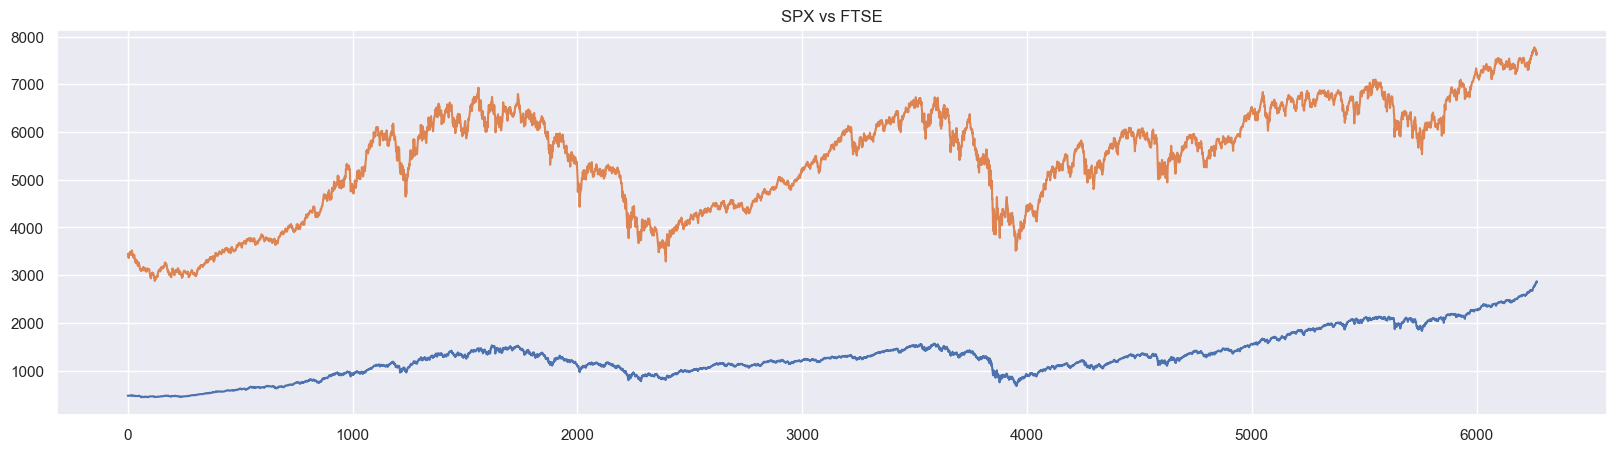

In [8]:
df_comp.spx.plot(figsize= (20,5),title='SPX')
df_comp.ftse.plot(figsize= (20,5),title='FTSE')
plt.title('SPX vs FTSE')
plt.show()

In [9]:
import scipy.stats as stats
import pylab as pl

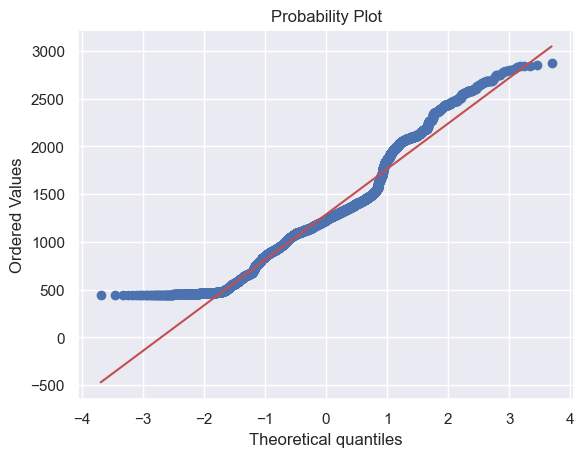

In [10]:
stats.probplot(df_comp.spx, plot=pl)
pl.show()

In [11]:
df_comp.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

In [12]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)

In [13]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [14]:
df_comp.date.describe()

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

In [15]:
df_comp.set_index('date', inplace=True)

In [16]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [17]:
df_comp=df_comp.asfreq('b')

In [18]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [19]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [20]:
df_comp.spx = df_comp.spx.ffill()
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [21]:
df_comp.ftse = df_comp.ftse.bfill()
df_comp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [22]:
df_comp.dax = df_comp.dax.fillna(df_comp.dax.mean())
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [23]:
df_comp.nikkei = df_comp.nikkei.ffill()
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [24]:
df_comp['market_value'] = df_comp.ftse

In [25]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.672753,5423.690398
std,487.868210,2752.604984,1145.568370,4043.795272,1145.568370
min,438.920000,1911.700000,2876.600000,7054.980000,2876.600000
25%,992.715221,4070.460000,4487.880000,10701.130000,4487.880000
50%,1233.761241,5774.380000,5663.300000,15030.510000,5663.300000
75%,1460.250000,7442.660000,6304.630175,17860.470000,6304.630175
max,2872.867839,13559.600000,7778.637689,24124.150000,7778.637689


In [26]:
del df_comp['spx'],df_comp['ftse'],df_comp['dax'],df_comp['nikkei']

In [27]:
size = int(len(df_comp)*0.8) 
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

In [28]:
df.tail()

,market_value
date,
2013-04-01,6411.74
2013-04-02,6490.66
2013-04-03,6420.28
2013-04-04,6344.11
2013-04-05,6249.77


In [29]:
df_test.head()

,market_value
date,
2013-04-08,6276.94
2013-04-09,6313.20
2013-04-10,6387.37
2013-04-11,6416.14
2013-04-12,6384.39


In [30]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

In [31]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [32]:
df['wn'] = wn

/var/folders/nk/tzs157bs2zl7cfxbfgzc6n_h0000gn/T/ipykernel_7493/532279809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [33]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,5089.701492,5086.312784
std,1017.113459,1018.341273
min,2876.600000,1384.034319
25%,4274.040000,4385.751786
50%,5266.060000,5087.154593
75%,5917.800000,5761.778131
max,6930.200000,9419.481657


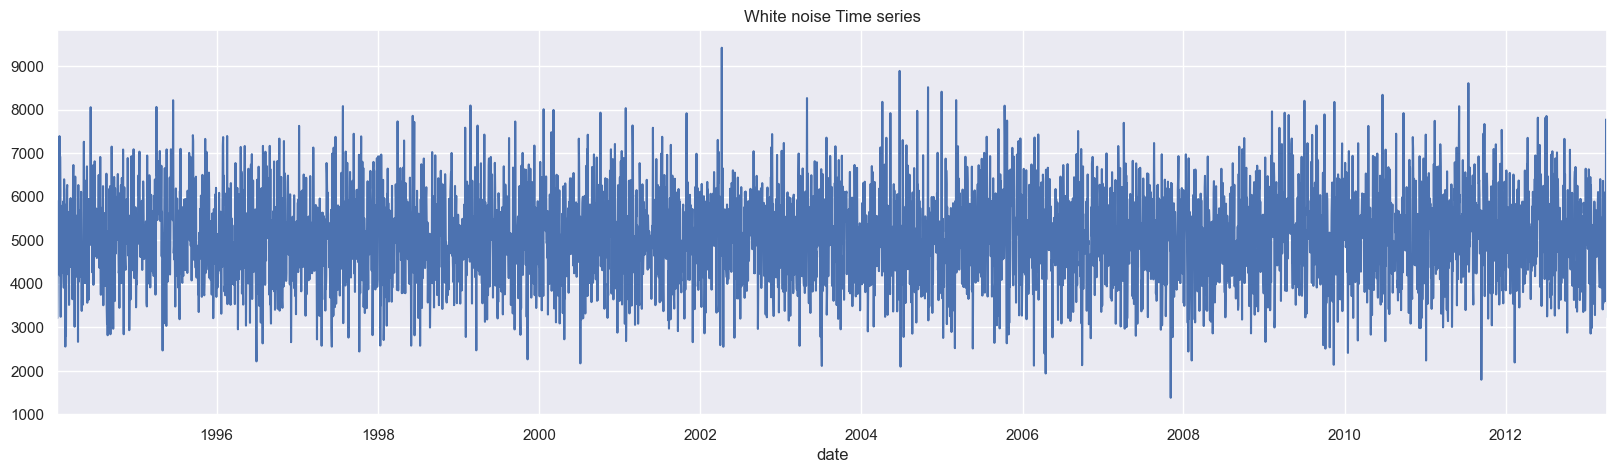

In [34]:
df.wn.plot(figsize= (20,5))
plt.title('White noise Time series')
plt.show()

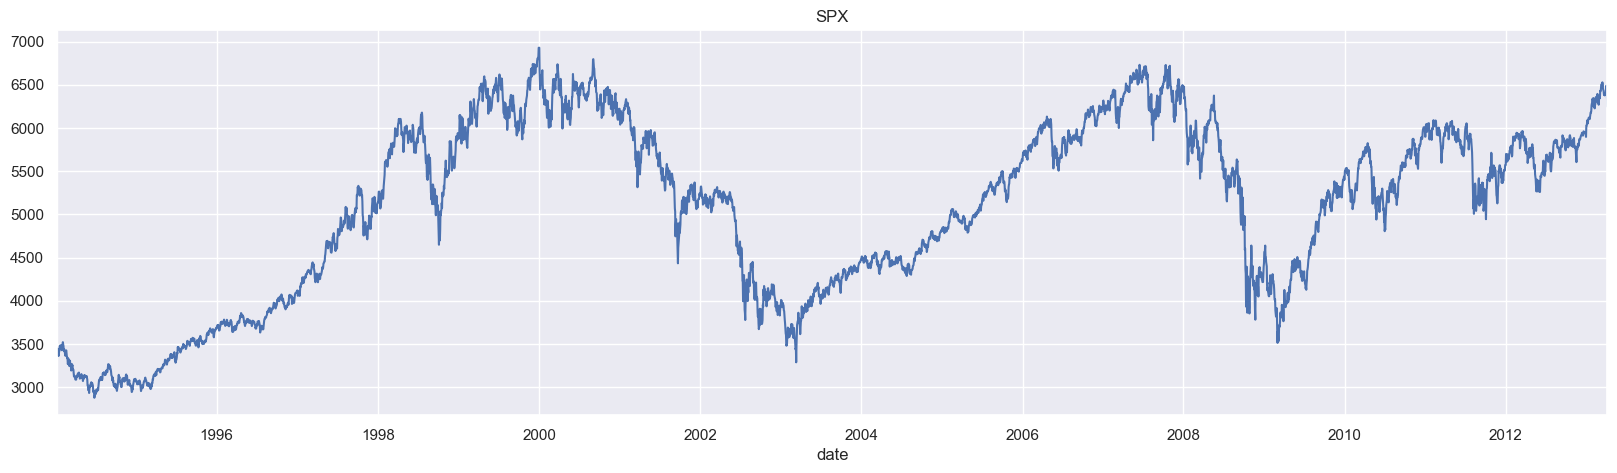

In [37]:
df.market_value.plot(figsize= (20,5))
plt.title('SPX')
plt.show()

In [38]:
rw = pd.read_csv('RandWalk.csv')
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace=True)
rw = rw.asfreq('b')

In [39]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [40]:
df['rw'] = rw.price

/var/folders/nk/tzs157bs2zl7cfxbfgzc6n_h0000gn/T/ipykernel_7493/2904626463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


In [41]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,3445.98,3212.609992,1122.139662
1994-01-10,3440.58,4505.396793,1080.347860
1994-01-11,3413.77,4442.777330,1082.095245
1994-01-12,3372.02,5904.121251,1083.639265
1994-01-13,3360.01,5367.554669,1067.146255


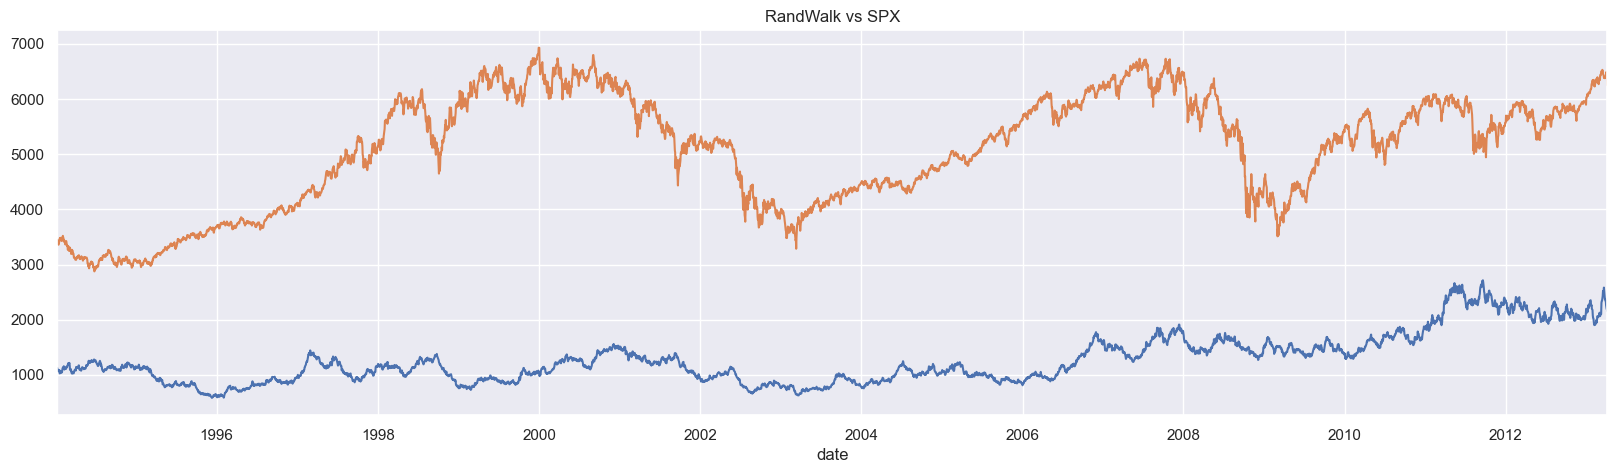

In [42]:
df.rw.plot(figsize= (20,5))
df.market_value.plot(figsize= (20,5))
plt.title('RandWalk vs SPX')
plt.show()

In [43]:
sts.adfuller(df.market_value)

(np.float64(-1.9049356385026284),
 np.float64(0.329742804931887),
 6,
 5014,
 {'1%': np.float64(-3.4316548765428174),
  '5%': np.float64(-2.8621166146845334),
  '10%': np.float64(-2.5670769326348926)},
 np.float64(54856.46568853504))

In [44]:
sts.adfuller(df.wn)

(np.float64(-69.5149837843832),
 0.0,
 0,
 5020,
 {'1%': np.float64(-3.431653316130827),
  '5%': np.float64(-2.8621159253018247),
  '10%': np.float64(-2.5670765656497516)},
 np.float64(83242.30578975138))

In [45]:
sts.adfuller(df.rw)

(np.float64(-1.328607392768972),
 np.float64(0.6159849181617384),
 24,
 4996,
 {'1%': np.float64(-3.4316595802782865),
  '5%': np.float64(-2.8621186927706463),
  '10%': np.float64(-2.567078038881065)},
 np.float64(46299.333497595144))

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

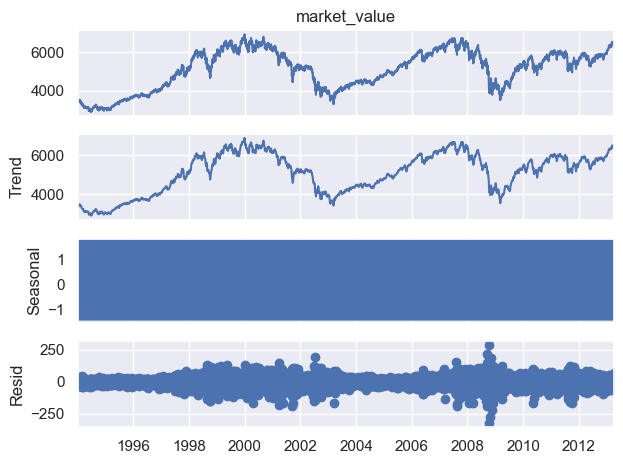

In [47]:
s_dec_add = seasonal_decompose(df.market_value, model = 'additive')
s_dec_add.plot()
plt.show()

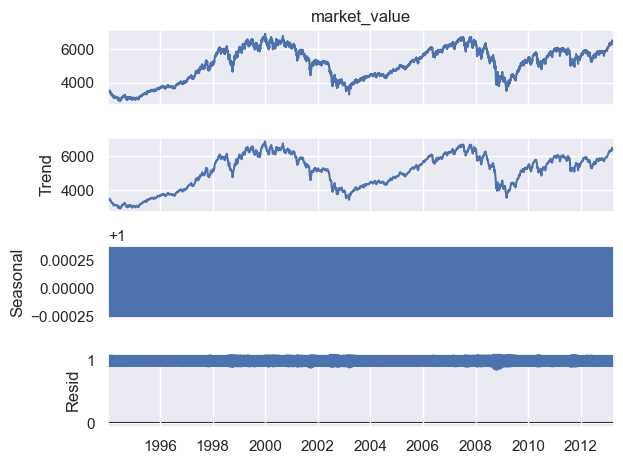

In [48]:
s_dec_mul = seasonal_decompose(df.market_value, model = 'multiplicative')
s_dec_mul.plot()
plt.show()

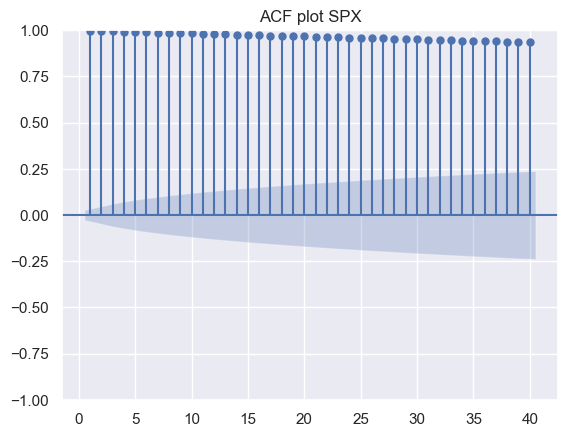

In [49]:
sgt.plot_acf(df.market_value,lags = 40, zero=False)
plt.title('ACF plot SPX')
plt.show()

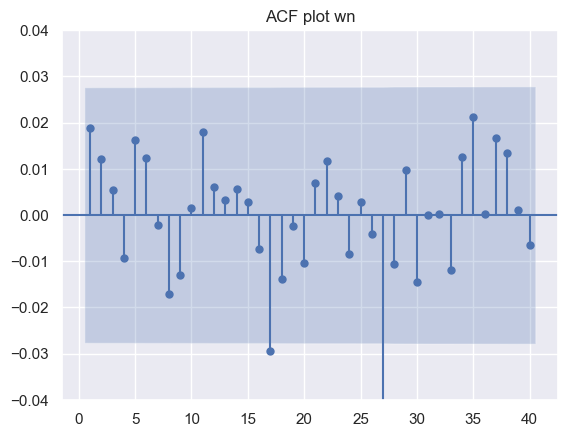

In [50]:
sgt.plot_acf(df.wn, lags=40, zero=False)
plt.ylim(-0.04,0.04)
plt.title('ACF plot wn')
plt.show()

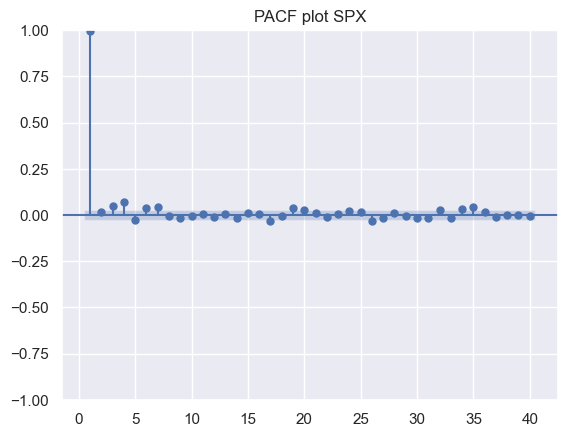

In [51]:
sgt.plot_pacf(df.market_value, lags=40, zero=False, method='ols')
plt.title('PACF plot SPX')
plt.show()

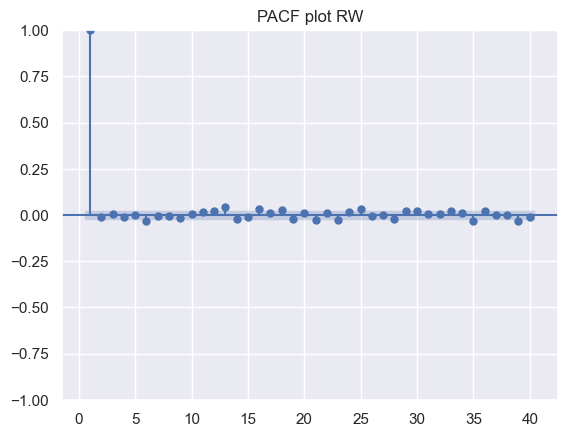

In [52]:
sgt.plot_pacf(df.rw, lags=40, zero=False, method='ols')
plt.title('PACF plot RW')
plt.show()

In [59]:
from statsmodels.tsa.arima.model import ARIMA

In [60]:
model_ar = ARIMA(df.market_value, order=(1,0,0)) 
results_ar = model_ar.fit()

In [61]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -27622.604
Date:                Wed, 03 Jul 2024   AIC                          55251.207
Time:                        10:42:38   BIC                          55270.772
Sample:                    01-07-1994   HQIC                         55258.063
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6981    423.328     12.023      0.000    4259.991    5919.405
ar.L1          0.9984      0.001   1147.577      0.000       0.997       1.000
sigma2      3511.3842     40.874     85.907      0.000    3431.272    3591.496
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):              3313.33
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
model_ar2 = ARIMA(df.market_value, order=(2,0,0)) 
results_ar = model_ar2.fit()
# model_ar3 = ARIMA(df.market_value, order=(3,0,0)) 
# results_ar3 = model_ar.fit()
# model_ar = ARIMA(df.market_value, order=(1,0,0)) 
# results_ar = model_ar.fit()

In [63]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -27621.947
Date:                Wed, 03 Jul 2024   AIC                          55251.894
Time:                        10:42:40   BIC                          55277.980
Sample:                    01-07-1994   HQIC                         55261.035
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.7015    368.244     13.822      0.000    4367.956    5811.447
ar.L1          0.9810      0.010     99.872      0.000       0.962       1.000
ar.L2          0.0172      0.010      1.752      0.080      -0.002       0.036
sigma2      3510.1247     41.037     85.536      0.000    3429.694    3590.555
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3282.87
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
model_ar3 = ARIMA(df.market_value, order=(3,0,0)) 
results_ar3 = model_ar.fit()

In [65]:
model_ar7 = ARIMA(df.market_value, order=(7,0,0)) 
results_ar7 = model_ar.fit()

In [66]:
from scipy.stats import chi2


def LLR_test(mod_1,mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p
    

In [68]:
LLR_test(model_ar,model_ar7)

np.float64(0.0)

In [70]:
df['returns'] = df.market_value.pct_change(1)*100

/var/folders/nk/tzs157bs2zl7cfxbfgzc6n_h0000gn/T/ipykernel_7493/734042989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1)*100


In [71]:
df = df.iloc[1:]

In [72]:
sts.adfuller(df.returns)

(np.float64(-12.7869309572274),
 np.float64(7.21325504780047e-24),
 32,
 4987,
 {'1%': np.float64(-3.431661944885779),
  '5%': np.float64(-2.8621197374408225),
  '10%': np.float64(-2.5670785949998973)},
 np.float64(15700.846444346233))

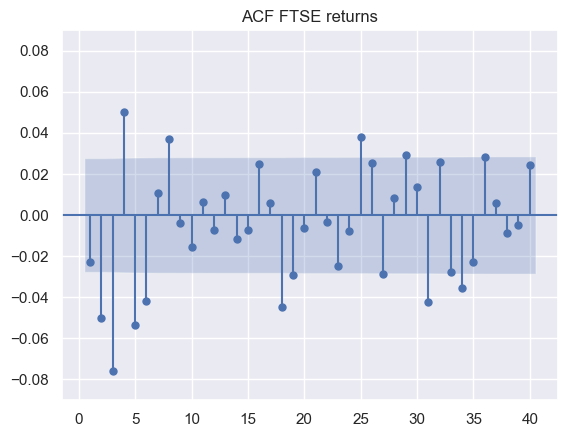

In [73]:
sgt.plot_acf(df.returns, lags=40, zero=False)
plt.ylim(-0.09,0.09)
plt.title('ACF FTSE returns')
plt.show()

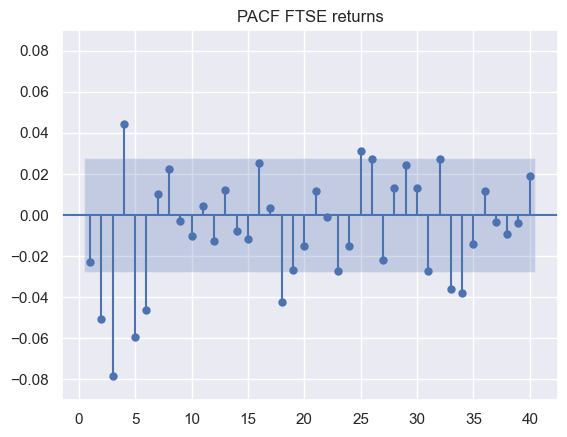

In [74]:
sgt.plot_pacf(df.returns, lags=40, zero=False)
plt.ylim(-0.09, 0.09)
plt.title('PACF FTSE returns')
plt.show()

In [75]:
model_ret_ar_6 = ARIMA(df.returns, order=(6,0,0))

In [76]:
results_ret_ar_6 = model_ret_ar_6.fit()

In [77]:
results_ret_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -7888.633
Date:                Wed, 03 Jul 2024   AIC                          15793.265
Time:                        10:43:13   BIC                          15845.435
Sample:                    01-10-1994   HQIC                         15811.546
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.323      0.186      -0.009       0.047
ar.L1         -0.0248      0.009     -2.672      0.008      -0.043      -0.007
ar.L2         -0.0529      0.008     -6.575      0.000      -0.069      -0.037
ar.L3         -0.0839      0.008    -10.462      0.000      -0.100      -0.068
ar.L4          0.0401      0.008      4.856      0.000       0.024       0.056
ar.L5         -0.0605      0.008     -7.539      0.000      -0.076      -0.045
ar.L6         -0.0464      0.009     -5.198      0.000      -0.064      -0.029
sigma2         1.3566      0.015     92.531      0.000       1.328       1.385
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6512.03
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
model_ret_ar_2 = ARIMA(df.returns, order=(2,0,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -7923.305
Date:                Wed, 03 Jul 2024   AIC                          15854.609
Time:                        10:43:15   BIC                          15880.694
Sample:                    01-10-1994   HQIC                         15863.749
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.194      0.232      -0.012       0.050
ar.L1         -0.0241      0.009     -2.794      0.005      -0.041      -0.007
ar.L2         -0.0507      0.008     -6.451      0.000      -0.066      -0.035
sigma2         1.3755      0.014     99.610      0.000       1.348       1.403
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              7732.48
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
LLR_test(model_ret_ar_6,model_ret_ar_2)

np.float64(1.0)

In [80]:
benchmark = df.market_value.iloc[0]

In [81]:
df['norm'] = df.market_value.div(benchmark).mul(100)

In [82]:
sts.adfuller(df.norm)

(np.float64(-1.8936568624122196),
 np.float64(0.33505098158646596),
 6,
 5013,
 {'1%': np.float64(-3.431655136974821),
  '5%': np.float64(-2.8621167297421373),
  '10%': np.float64(-2.567076993884522)},
 np.float64(19556.212836830153))

In [83]:
bench_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)
sts.adfuller(df.norm_ret)

(np.float64(-12.786930957227447),
 np.float64(7.213255047798761e-24),
 32,
 4987,
 {'1%': np.float64(-3.431661944885779),
  '5%': np.float64(-2.8621197374408225),
  '10%': np.float64(-2.5670785949998973)},
 np.float64(80118.5703598977))

In [84]:
model_norm_ret_ar_1 = ARIMA(df.norm_ret, order=(1,0,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -40351.751
Date:                Wed, 03 Jul 2024   AIC                          80709.501
Time:                        10:43:35   BIC                          80729.065
Sample:                    01-10-1994   HQIC                         80716.357
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731     10.476     -1.143      0.253     -32.506       8.560
ar.L1         -0.0230      0.009     -2.690      0.007      -0.040      -0.006
sigma2      5.617e+05   5612.608    100.077      0.000    5.51e+05    5.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7873.42
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
model_norm_ret_ar_7 = ARIMA(df.norm_ret, order=(7,0,0))
results_norm_ret_ar_7 = model_norm_ret_ar_7.fit()
results_norm_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -40310.358
Date:                Wed, 03 Jul 2024   AIC                          80638.717
Time:                        10:44:07   BIC                          80697.408
Sample:                    01-10-1994   HQIC                         80659.283
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731      9.258     -1.293      0.196     -30.118       6.172
ar.L1         -0.0241      0.009     -2.587      0.010      -0.042      -0.006
ar.L2         -0.0522      0.008     -6.441      0.000      -0.068      -0.036
ar.L3         -0.0845      0.008    -10.352      0.000      -0.101      -0.069
ar.L4          0.0408      0.008      4.882      0.000       0.024       0.057
ar.L5         -0.0600      0.008     -7.435      0.000      -0.076      -0.044
ar.L6         -0.0461      0.009     -5.153      0.000      -0.064      -0.029
ar.L7          0.0104      0.009      1.147      0.251      -0.007       0.028
sigma2      5.528e+05   6026.243     91.734      0.000    5.41e+05    5.65e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6476.06
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
df['res_price'] = results_ar7.resid

In [87]:
df.res_price.mean()

np.float64(0.5581679102806828)

In [88]:
df.res_price.var()

np.float64(3510.923502586612)

In [89]:
sts.adfuller(df.res_price)

(np.float64(-32.155724573744614),
 0.0,
 5,
 5014,
 {'1%': np.float64(-3.4316548765428174),
  '5%': np.float64(-2.8621166146845334),
  '10%': np.float64(-2.5670769326348926)},
 np.float64(54844.57391184477))

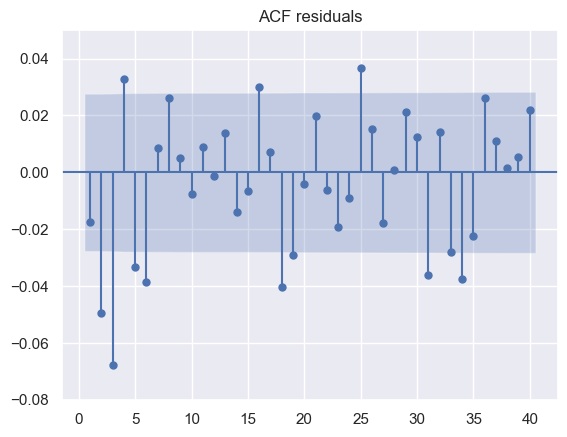

In [90]:
sgt.plot_acf(df.res_price, lags=40, zero=False)
plt.ylim(-0.08,0.05)
plt.title('ACF residuals')
plt.show()

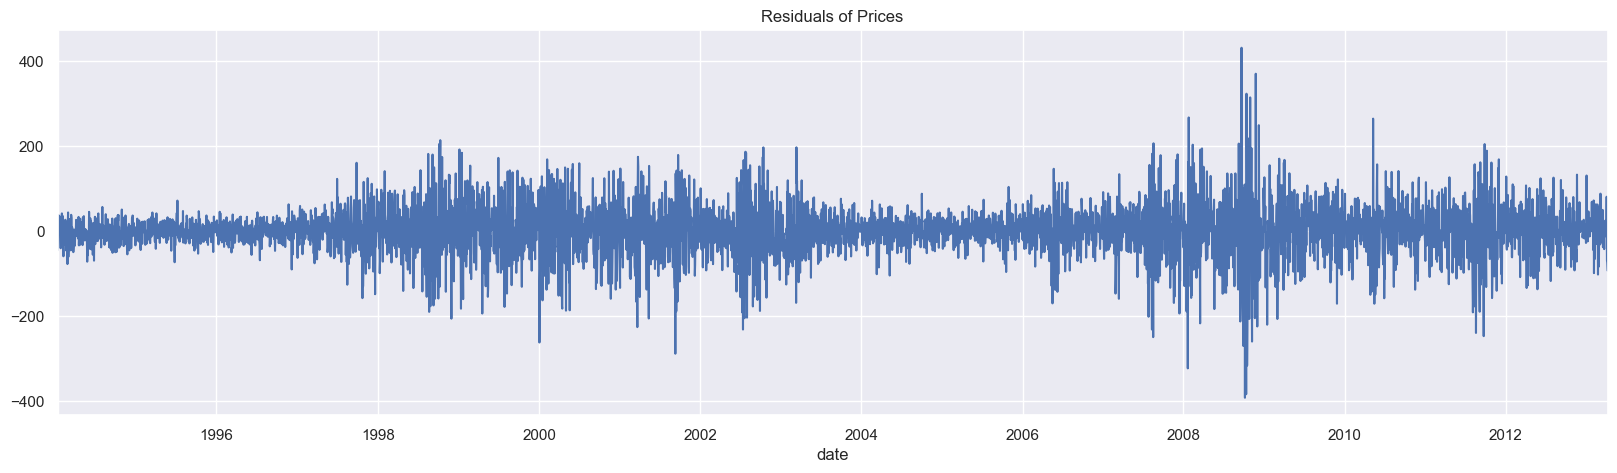

In [91]:
df.res_price[1:].plot(figsize= (20,5))
plt.title('Residuals of Prices')
plt.show()

In [92]:
df['res_ret'] = results_ret_ar_6.resid

In [93]:
df.res_ret.mean()

np.float64(-4.825357390168134e-05)

In [94]:
df.res_ret.var()

np.float64(1.3568925966655823)

In [95]:
sts.adfuller(df.res_ret)

(np.float64(-70.78594469270703),
 0.0,
 0,
 5019,
 {'1%': np.float64(-3.4316535759402753),
  '5%': np.float64(-2.8621160400844468),
  '10%': np.float64(-2.567076626752987)},
 np.float64(15695.9295093166))

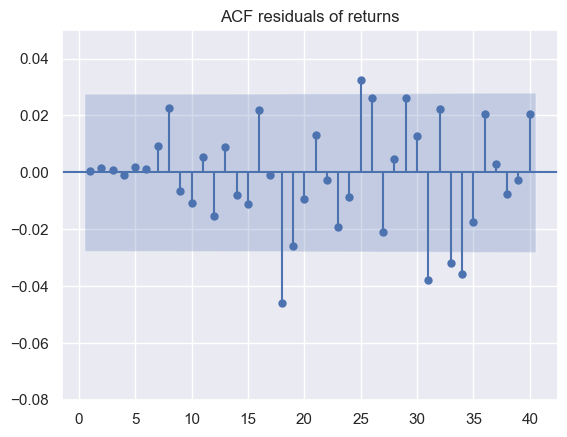

In [96]:
sgt.plot_acf(df.res_ret, lags=40, zero=False)
plt.ylim(-0.08,0.05)
plt.title('ACF residuals of returns')
plt.show()

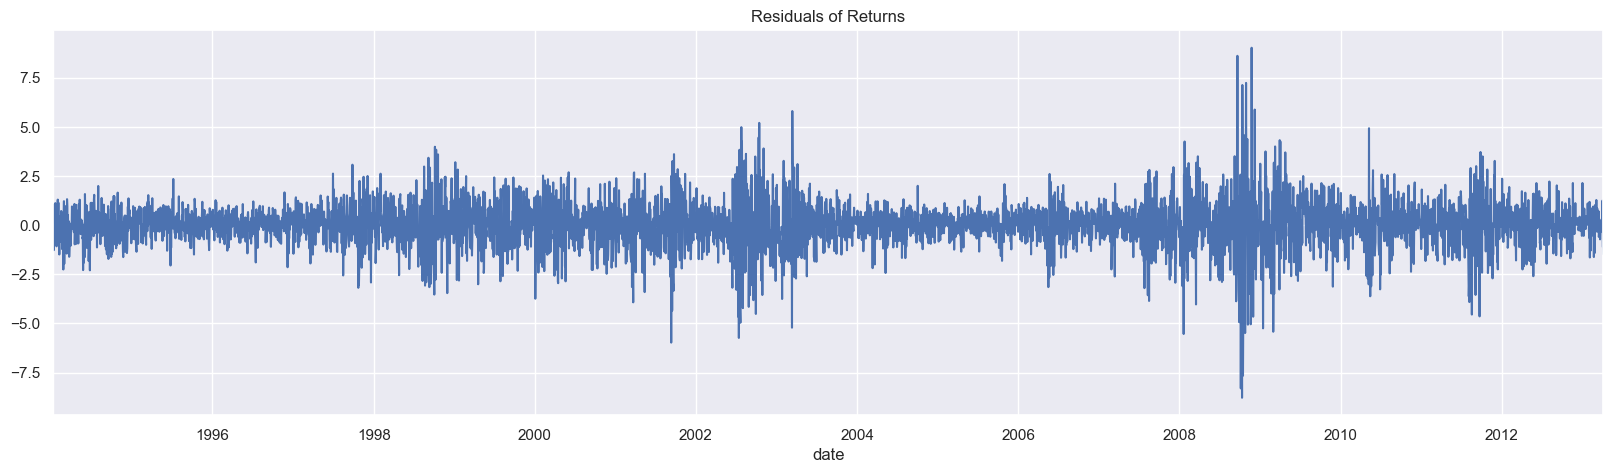

In [97]:
df.res_ret[1:].plot(figsize= (20,5))
plt.title('Residuals of Returns')
plt.show()